In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import multiprocessing as mp
import pandas as pd
import numpy as np
from functools import partial
import random

from helper_functions import *

In [12]:
%%time
if __name__ == '__main__':
    HORIZON = 8
    WINDOW_SIZE = 8

    train = pd.read_csv('train.csv')
    IDS = train.cfips.unique()

    x_train = np.arange(39).reshape((-1,1))
    x_test = np.arange(31,39).reshape((-1,1))
    random_ids = random.sample(list(IDS), 100)
    window_size = WINDOW_SIZE
    horizon = HORIZON
    epoch = 500
    
    cfips_list = []
    mapes = []
    density_values = []
    active_size = []
    forecasts = []

    pool = mp.Pool(16)

    func = partial(train_get_result, train, window_size, horizon, epoch)
    results = pool.map(func, random_ids)
    pool.close()
    pool.join()
    
    # Create DataFrame
    for i in range(len(results)):
        c = results[i][0]
        cfips_list.append(c)
        last_density = results[i][1]
        density_values.append(last_density)
        last_active = results[i][2]
        active_size.append(last_active)
        mape = results[i][3]
        mapes.append(mape)
        preds = results[i][4]
        forecasts.append(preds)
    
    result_df = pd.DataFrame({'Country': cfips_list,
                             'MAPE': mapes,
                             "Density": density_values,
                             'Active': active_size,
                             'forecast': forecasts})

CPU times: total: 4.19 s
Wall time: 47.1 s


In [13]:
result_df

,Country,MAPE,Density,Active,forecast
0,30073,2.545285,2.094008,94,"(tf.Tensor(2.056383, shape=(), dtype=float32),..."
1,1131,5.175860,1.144279,92,"(tf.Tensor(1.1754951, shape=(), dtype=float32)..."
2,47121,0.957627,1.383906,135,"(tf.Tensor(1.343347, shape=(), dtype=float32),..."
3,36009,5.366442,2.693873,1608,"(tf.Tensor(2.5363865, shape=(), dtype=float32)..."
4,51075,6.266860,5.639857,1089,"(tf.Tensor(5.254718, shape=(), dtype=float32),..."
...,...,...,...,...,...
95,30037,3.280676,6.250000,42,"(tf.Tensor(5.8207726, shape=(), dtype=float32)..."
96,6055,2.371029,11.430052,12575,"(tf.Tensor(11.641295, shape=(), dtype=float32)..."
97,30021,1.857769,2.650809,185,"(tf.Tensor(2.6436152, shape=(), dtype=float32)..."
98,29053,1.183127,2.046335,280,"(tf.Tensor(2.0432706, shape=(), dtype=float32)..."


In [14]:
32* 47.1 / 60

25.12

## Plot randomly

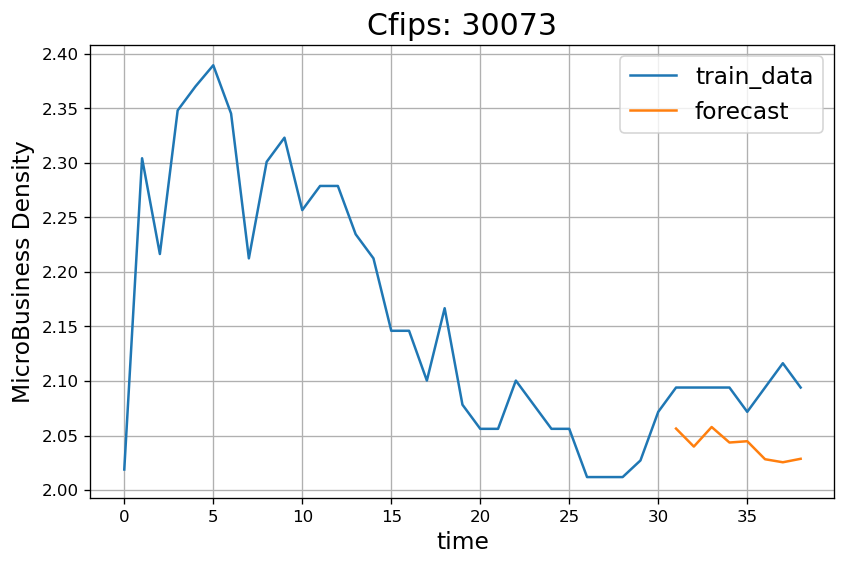

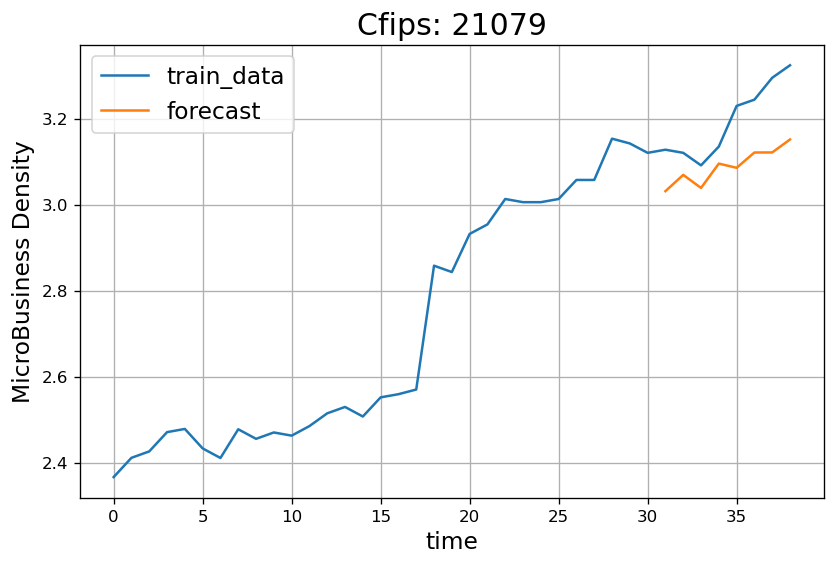

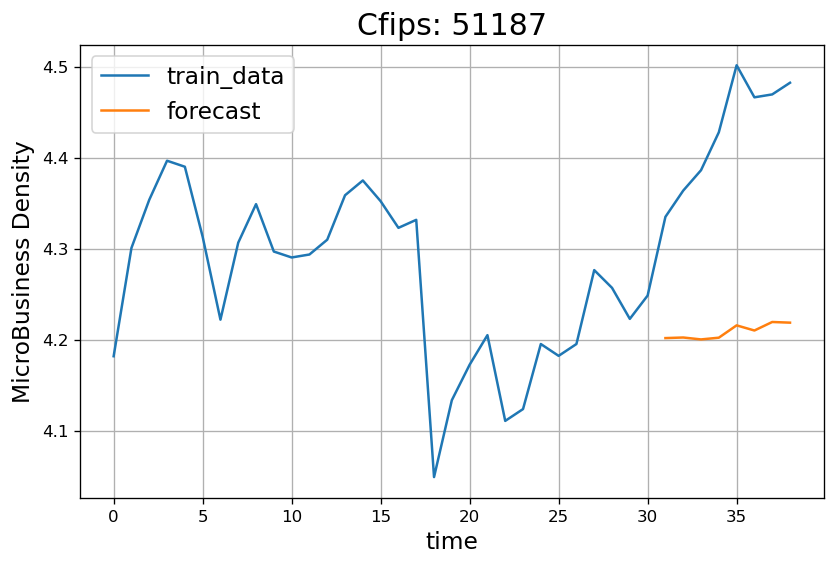

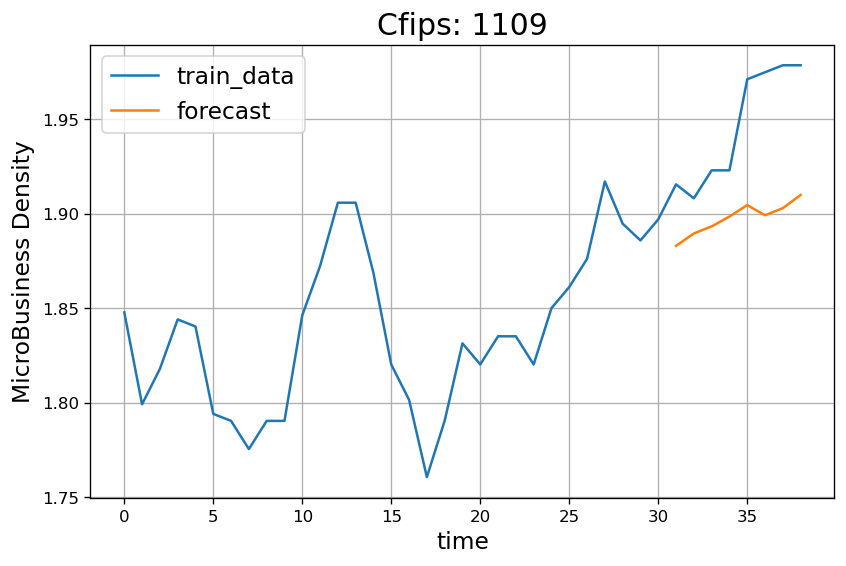

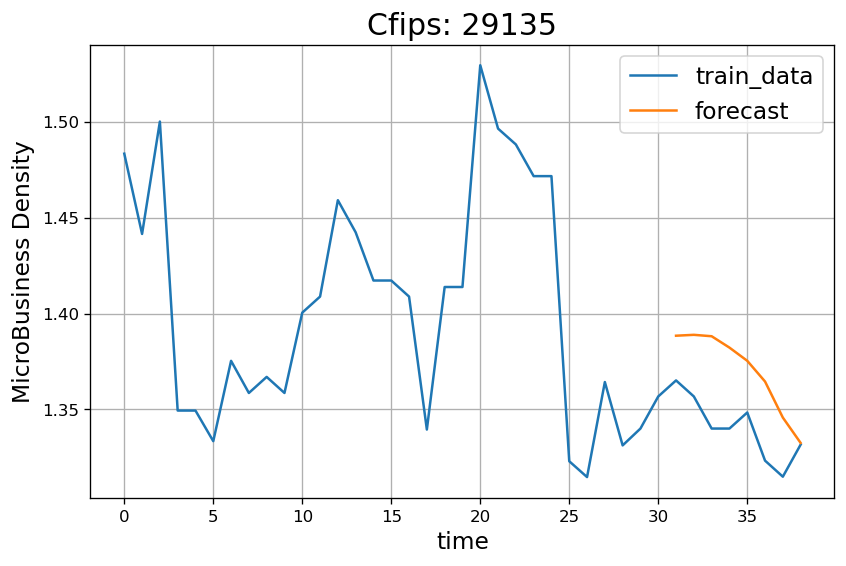

In [15]:
for idx in random.sample(list(result_df.index), 5):
    c = result_df.loc[idx].Country
    df = train[train.cfips == c]
    preds = result_df.loc[idx].forecast
    plot_time_series(c, x_train, df.microbusiness_density.values, label='train_data')
    plot_time_series(c, x_test, preds, label='forecast')
    plt.show()

In [18]:
(3*60 + 52) / 47.1

4.925690021231422

In [19]:
2*60 / 4.92

24.390243902439025

## Conclusion:

Without multiprocessing, the process for 100 countries took about 3min 52sec. It took 47.1sec with using multiprocessing, so about 5 times quicker process with multiprocessing. 

With Dense layer, the process took almost 2 hours but with multiprocessing, it should take 24 min. 

In [2]:
%%time
if __name__ == '__main__':
    HORIZON = 8
    WINDOW_SIZE = 8

    train = pd.read_csv('train.csv')
    IDS = train.cfips.unique()

    x_train = np.arange(39).reshape((-1,1))
    x_test = np.arange(31,39).reshape((-1,1))
    window_size = WINDOW_SIZE
    horizon = HORIZON
    epoch = 500
    
    cfips_list = []
    mapes = []
    density_values = []
    active_size = []
    forecasts = []

    pool = mp.Pool(16)

    func = partial(train_get_result, train, window_size, horizon, epoch)
    results = pool.map(func, IDS)
    pool.close()
    pool.join()
    
    # Create DataFrame
    for i in range(len(results)):
        c = results[i][0]
        cfips_list.append(c)
        last_density = results[i][1]
        density_values.append(last_density)
        last_active = results[i][2]
        active_size.append(last_active)
        mape = results[i][3]
        mapes.append(mape)
        preds = results[i][4]
        forecasts.append(preds)
    
    result_df = pd.DataFrame({'Country': cfips_list,
                             'MAPE': mapes,
                             "Density": density_values,
                             'Active': active_size,
                             'forecast': forecasts})

CPU times: total: 6.25 s
Wall time: 16min 39s


In [3]:
result_df

,Country,MAPE,Density,Active,forecast
0,1001,1.504614,3.463856,1472,"(tf.Tensor(3.3091352, shape=(), dtype=float32)..."
1,1003,4.143341,8.359798,14320,"(tf.Tensor(7.858338, shape=(), dtype=float32),..."
2,1005,1.395184,1.232074,244,"(tf.Tensor(1.1614107, shape=(), dtype=float32)..."
3,1007,5.228748,1.287240,229,"(tf.Tensor(1.222997, shape=(), dtype=float32),..."
4,1009,1.442244,1.831783,813,"(tf.Tensor(1.7523701, shape=(), dtype=float32)..."
...,...,...,...,...,...
3130,56037,8.937141,2.823801,905,"(tf.Tensor(3.1033065, shape=(), dtype=float32)..."
3131,56039,3.437833,26.273220,5035,"(tf.Tensor(25.547161, shape=(), dtype=float32)..."
3132,56041,4.339746,4.009369,582,"(tf.Tensor(3.8359427, shape=(), dtype=float32)..."
3133,56043,2.373714,3.126551,189,"(tf.Tensor(3.0504284, shape=(), dtype=float32)..."


In [4]:
result_df.to_csv("dense_results_full_data.csv", index=False)

I saved the resuts as dense_results_full_data.csv. It only took less than 17 munites. I will use this results for analyze then find a way to maximize MAPE>